# 🧪 Pre‑Parcial – Métodos Predictivos
**Supervisado vs. No Supervisado**

> Completa las celdas con `TODO` y ejecuta *Runtime → Run all* antes de entregar.


### Contenido
1. [Parte A – Teoría](#parte-a)
2. [Parte B – Práctica](#parte-b)


## <a id='parte-a'></a>📝 Parte A — Cuestionario Teórico (40 pts)
Responde **brevemente** en las celdas Markdown que siguen a cada pregunta.


#### 1️⃣ **Variable objetivo (y)** – Defínela y da un ejemplo en este dataset.

*Respuesta:* <!-- TODO -->


#### 2️⃣ Ordena las fases del *pipeline* de ML: `Modelado`, `Pre‑procesamiento`, `EDA`, `Evaluación`, `Insight de negocio`.

*Respuesta:* <!-- TODO -->


#### 3️⃣ Para un problema de **clases desbalanceadas**, ¿qué métrica priorizarías y por qué?

*Respuesta:* <!-- TODO -->


#### 4️⃣ Describe **overfitting** y cómo lo detectarías en la práctica.

*Respuesta:* <!-- TODO -->


#### 5️⃣ Completa: *K‑means es un algoritmo de _________ porque ________.*

*Respuesta:* <!-- TODO -->


#### 7️⃣ En **regresión**, ¿cómo es la variable objetivo? (cualitativa, cuantitativa, binaria…).

*Respuesta:* <!-- TODO -->


#### 8️⃣ Menciona 2 técnicas comunes de **pre‑procesamiento de texto**.

*Respuesta:* <!-- TODO -->


#### 9️⃣ ¿Qué representa el parámetro *k* en K‑means y qué ocurre si es muy grande?

*Respuesta:* <!-- TODO -->


#### 🔟 Define brevemente un **embedding** en NLP y su utilidad.

*Respuesta:* <!-- TODO -->


## <a id='parte-b'></a>💻 Parte B — Práctica (60 pts)
Trabajarás con la tabla de reseñas de Amazon que contiene, entre otras, las columnas `reviewerID`, `asin`, `helpful`, `reviewText`, `overall`, `summary`, `unixReviewTime`, `day_diff`.

> **Objetivos**
> 1. Clasificar reseñas positivas (rating ≥ 4) vs negativas.
> 2. Agrupar reseñas con K‑means y perfilar clusters.


Columnas de la tabla
📄 Reviewer ID: Unique identifier for the reviewer.

📦 ASIN: Amazon Standard Identification Number for the product.

👤 Reviewer Name: Name of the reviewer.

👍 Helpful: Number of helpful votes the review received.

📝 Review Text: The content of the review written by the customer.

⭐ Overall Rating: The overall rating given to the product (ranging from 1 to 5 stars).

📰 Summary: A brief summary of the review.

🕰️ Unix Review Time: The time the review was posted in Unix timestamp format.

📅 Review Time: The time the review was posted in a readable date format.

📆 Day Difference: The number of days between the review date and the current date.

✔️ Helpful Yes: Number of positive helpful votes.

🔢 Total Votes: Total number of votes the review received.

### 1. Setup

In [1]:
# Instala paquetes extra si los necesitas
# !pip install shap

import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings, random, os
warnings.filterwarnings('ignore')
random.seed(42)
np.random.seed(42)

### 2. Carga del dataset

In [2]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip

--2025-06-04 02:45:18--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip [following]
--2025-06-04 02:45:18--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon_review.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 721801 (705K) [application/zip]
Saving to: ‘amazon_review.csv.zip’

amazon_review.csv.z 100%[===================>] 704.8

In [3]:
!unzip amazon_review.csv.zip

Archive:  amazon_review.csv.zip
  inflating: amazon_review.csv       


In [4]:
import pandas as pd
df = pd.read_csv('amazon_review.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0


### 3. Exploratory Data Analysis (EDA)

Primeras filas del DataFrame:
       reviewerID        asin  reviewerName helpful  \
0  A3SBTW3WS4IQSN  B007WTAJTO           NaN  [0, 0]   
1  A18K1ODH1I2MVB  B007WTAJTO          0mie  [0, 0]   
2  A2FII3I2MBMUIA  B007WTAJTO           1K3  [0, 0]   
3   A3H99DFEG68SR  B007WTAJTO           1m2  [0, 0]   
4  A375ZM4U047O79  B007WTAJTO  2&amp;1/2Men  [0, 0]   

                                          reviewText  overall  \
0                                         No issues.      4.0   
1  Purchased this for my device, it worked as adv...      5.0   
2  it works as expected. I should have sprung for...      4.0   
3  This think has worked out great.Had a diff. br...      5.0   
4  Bought it with Retail Packaging, arrived legit...      5.0   

                                  summary  unixReviewTime  reviewTime  \
0                              Four Stars      1406073600  2014-07-23   
1                           MOAR SPACE!!!      1382659200  2013-10-25   
2               nothing to re

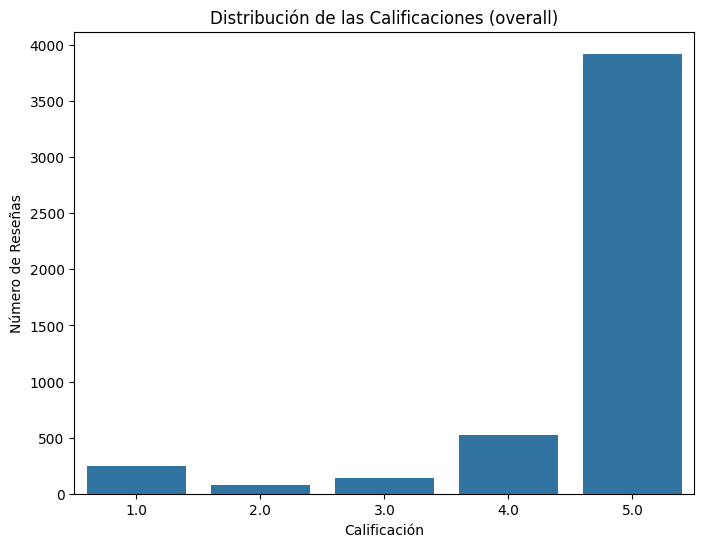

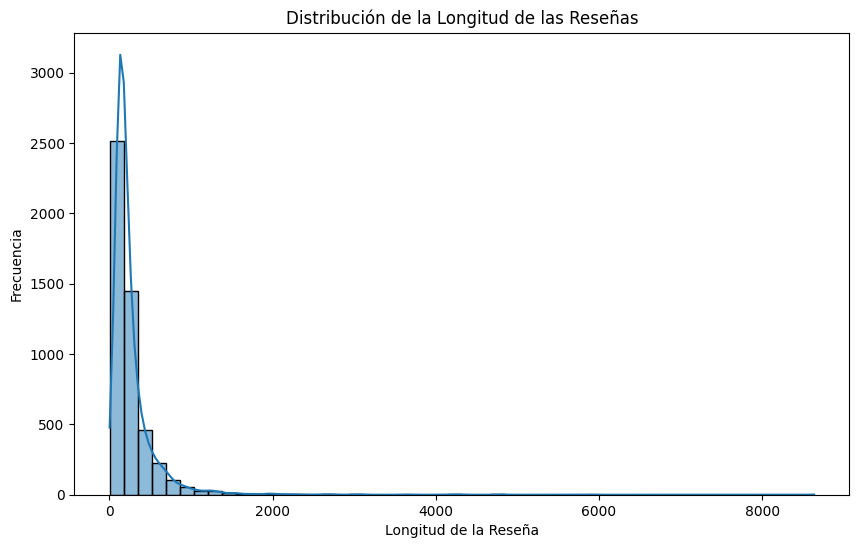

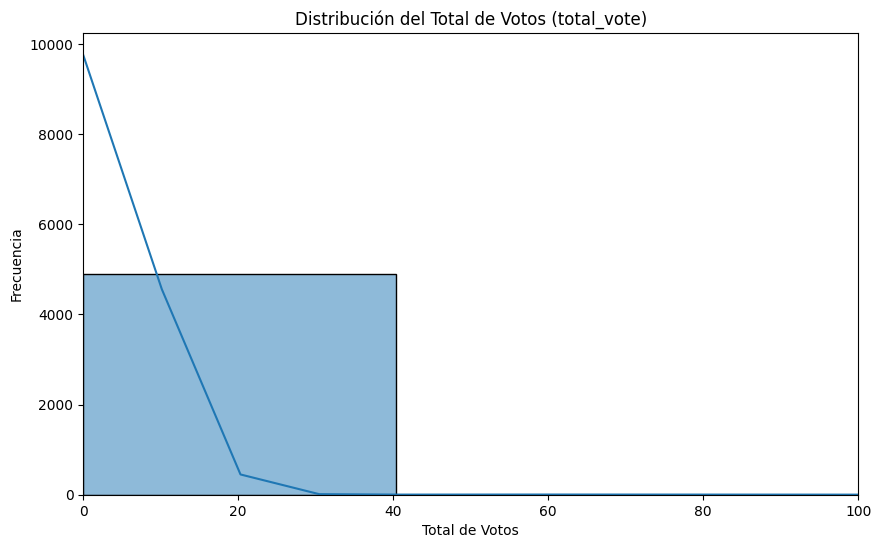

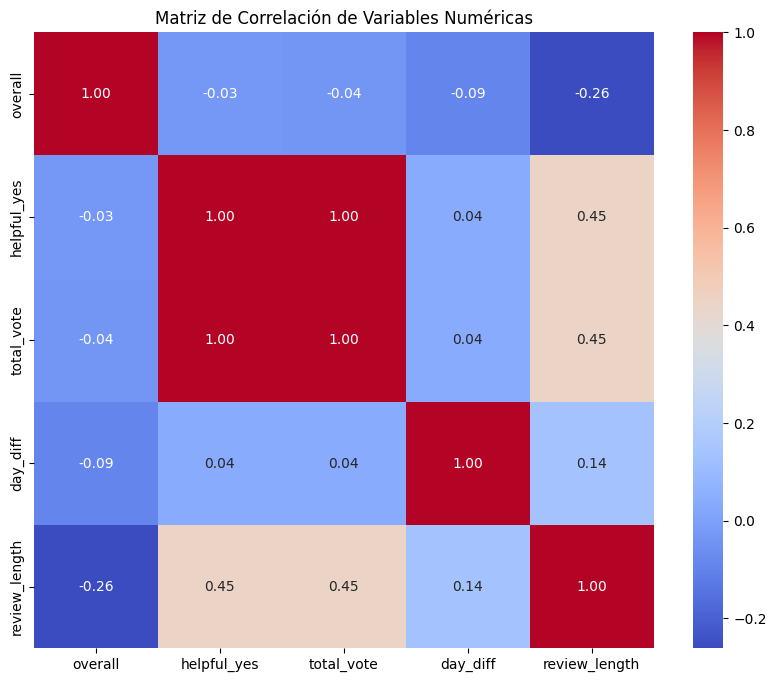

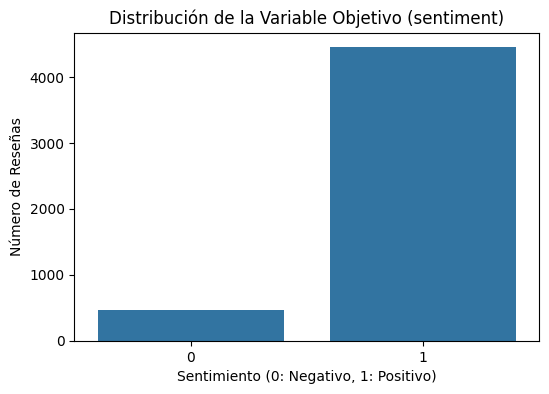


Conteo de la variable objetivo 'sentiment':
sentiment
1    4449
0     466
Name: count, dtype: int64


In [6]:


import matplotlib.pyplot as plt

print("Primeras filas del DataFrame:")
print(df.head())

print("\nInformación del DataFrame:")
print(df.info())
print("\nEstadísticas descriptivas:")
print(df.describe())

print("\nValores faltantes por columna:")
print(df.isnull().sum())
plt.figure(figsize=(8, 6))
sns.countplot(x='overall', data=df)
plt.title('Distribución de las Calificaciones (overall)')
plt.xlabel('Calificación')
plt.ylabel('Número de Reseñas')
plt.show()

df['review_length'] = df['reviewText'].apply(lambda x: len(str(x)))
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True)
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Longitud de la Reseña')
plt.ylabel('Frecuencia')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['total_vote'], bins=50, kde=True)
plt.title('Distribución del Total de Votos (total_vote)')
plt.xlabel('Total de Votos')
plt.ylabel('Frecuencia')
plt.xlim(0, 100)
plt.show()

numeric_cols = ['overall', 'helpful_yes', 'total_vote', 'day_diff', 'review_length']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Variables Numéricas')
plt.show()
df['sentiment'] = df['overall'].apply(lambda x: 1 if x >= 4 else 0)


plt.figure(figsize=(6, 4))
sns.countplot(x='sentiment', data=df)
plt.title('Distribución de la Variable Objetivo (sentiment)')
plt.xlabel('Sentimiento (0: Negativo, 1: Positivo)')
plt.ylabel('Número de Reseñas')
plt.show()

print("\nConteo de la variable objetivo 'sentiment':")
print(df['sentiment'].value_counts())



### 4. Limpieza & Feature Engineering

### 4.1 Cree un revie_datetime usando unixReviewTime y la funcion pd.to_datetime

In [8]:


import pandas as pd
df['review_datetime'] = pd.to_datetime(df['unixReviewTime'], unit='s')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,review_length,sentiment,review_datetime
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,10,1,2014-07-23
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,158,1,2013-10-25
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,166,1,2012-12-23
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,340,1,2013-11-21
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,290,1,2013-07-13


### 4.2 Cree una columna positive que sea igual a 1 cuando overall sea mayor o igual  a 4.

In [9]:

df['positive'] = (df['overall'] >= 4).astype(int)

### 4.3 Cree una columna text que sea la union de summary y review text: text_cols['summary'] + '. ' + text_cols['reviewText']).str.strip()

In [10]:


df['text'] = (df['summary'].astype(str) + '. ' + df['reviewText'].astype(str)).str.strip()
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime,day_diff,helpful_yes,total_vote,review_length,sentiment,review_datetime,positive,text
0,A3SBTW3WS4IQSN,B007WTAJTO,NaN,"[0, 0]",No issues.,4.0,Four Stars,1406073600,2014-07-23,138,0,0,10,1,2014-07-23,1,Four Stars. No issues.
1,A18K1ODH1I2MVB,B007WTAJTO,0mie,"[0, 0]","Purchased this for my device, it worked as adv...",5.0,MOAR SPACE!!!,1382659200,2013-10-25,409,0,0,158,1,2013-10-25,1,"MOAR SPACE!!!. Purchased this for my device, i..."
2,A2FII3I2MBMUIA,B007WTAJTO,1K3,"[0, 0]",it works as expected. I should have sprung for...,4.0,nothing to really say....,1356220800,2012-12-23,715,0,0,166,1,2012-12-23,1,nothing to really say..... it works as expecte...
3,A3H99DFEG68SR,B007WTAJTO,1m2,"[0, 0]",This think has worked out great.Had a diff. br...,5.0,Great buy at this price!!! *** UPDATE,1384992000,2013-11-21,382,0,0,340,1,2013-11-21,1,Great buy at this price!!! *** UPDATE. This t...
4,A375ZM4U047O79,B007WTAJTO,2&amp;1/2Men,"[0, 0]","Bought it with Retail Packaging, arrived legit...",5.0,best deal around,1373673600,2013-07-13,513,0,0,290,1,2013-07-13,1,best deal around. Bought it with Retail Packag...


### 4.4 Elimine las columnas que no puede usar en el modleo de clasificacion

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
        df['text'], df['positive'], test_size=0.3, stratify=df['positive'], random_state=42)

pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf',  LogisticRegression(max_iter=1000, class_weight='balanced', n_jobs=-1, random_state=42))
])



### 5. Modelo de Clasificación – Supervisado (25 pts)
  * Ralice una regreison logistica y use la columa positive que creoo como target, entregue una matriz de confusion

              precision    recall  f1-score   support

           0       0.55      0.78      0.64       140
           1       0.98      0.93      0.95      1335

    accuracy                           0.92      1475
   macro avg       0.76      0.86      0.80      1475
weighted avg       0.94      0.92      0.92      1475



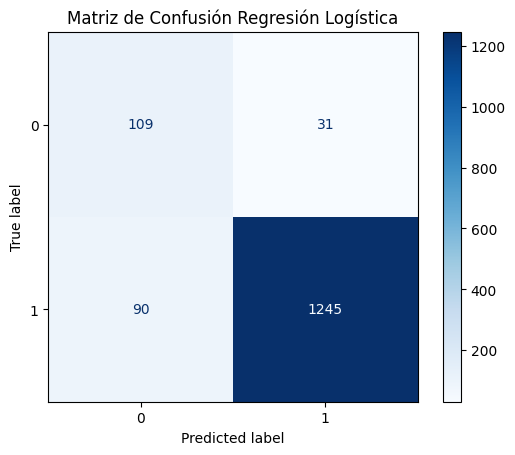

In [12]:


import matplotlib.pyplot as plt
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap='Blues')
plt.title('Matriz de Confusión Regresión Logística')
plt.show()

### 6. Clustering K‑means – No Supervisado (20 pts)
Haga un modelo para agrupasr los comentarios: vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

y cre una variable que se llame clsuter

In [14]:


vectorizer = TfidfVectorizer(max_features=10000)
X_vec = vectorizer.fit_transform(df['text'])

kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_vec)
df['cluster'] = clusters

#### Perfil de clusters: Entregue una descriptiva de que contenia cada clster en termino de las otras variables

In [15]:


for i in range(kmeans.n_clusters):
  print(f"\nDescripción del Cluster {i}:")
  cluster_data = df[df['cluster'] == i]
  print(cluster_data[numeric_cols + ['sentiment']].describe())
  print("\nConteo de sentimientos en este cluster:")
  print(cluster_data['sentiment'].value_counts(normalize=True))
  print("\nEjemplos de texto del cluster:")
  for text in cluster_data['text'].sample(min(5, len(cluster_data)), random_state=42):
    print(f"- {text[:100]}...")


Descripción del Cluster 0:
         overall  helpful_yes  total_vote    day_diff  review_length  \
count  50.000000         50.0        50.0   50.000000      50.000000   
mean    4.940000          0.0         0.0  155.760000      39.320000   
std     0.239898          0.0         0.0  109.559705      41.162912   
min     4.000000          0.0         0.0    1.000000       3.000000   
25%     5.000000          0.0         0.0   62.000000      18.250000   
50%     5.000000          0.0         0.0  154.000000      30.000000   
75%     5.000000          0.0         0.0  215.000000      49.000000   
max     5.000000          0.0         0.0  533.000000     274.000000   

       sentiment  
count       50.0  
mean         1.0  
std          0.0  
min          1.0  
25%          1.0  
50%          1.0  
75%          1.0  
max          1.0  

Conteo de sentimientos en este cluster:
sentiment
1    1.0
Name: proportion, dtype: float64

Ejemplos de texto del cluster:
- Five Stars. Can't beat th

### 7. Insight & Recomendaciones (15 pts)

*Escribe aquí tu análisis de cómo se relacionan los errores del modelo con los clusters y propone 1‑2 acciones de negocio basadas en tus hallazgos.*

<!-- TODO -->

## ✅ 8. Checklist final
- [ ] Notebook corre sin errores
- [ ] Respuestas teóricas completadas
- [ ] Comentarios claros y semillas fijas
- [ ] 5 slides creadas y exportadas a PDF
